# XGBoosting Regression Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_feature = pd.read_csv('Ready_for_machine_learning_2019_1_23.csv')
df_feature.head()

,CurrentAcres,TotalGrossArea,FinishedArea,CurrentLandValue,CurrentYardItemsValue,CurrentBuildingValue,Grade,YearBlt,SalePrice,NumofRooms,...,HeatType_188,HeatType_281,HeatType_739,HeatType_3893,HeatType_4255,Foundation_130,Foundation_1219,Foundation_2322,Foundation_2628,Foundation_3199
0,0.05597,1760,840.00000,121600,0,30900.0,5,1912,158000,5,...,0,0,0,1,0,0,0,0,1,0
1,0.08242,2676,1436.00000,94400,700,146800.0,7,1899,231750,7,...,0,0,0,0,1,0,0,0,1,0
2,0.00000,2184,1572.80005,0,0,268000.0,10,1986,381500,6,...,0,0,0,0,1,0,1,0,0,0
3,0.09832,3699,2087.00000,130100,0,210700.0,8,1910,430000,8,...,0,0,0,1,0,0,0,0,1,0
4,0.70154,62852,37977.00000,547700,51800,1306100.0,9,2013,505683,103,...,0,0,0,0,1,0,1,0,0,0


#### Set the target and variables.

In [3]:
X = df_feature.drop(columns=['SalePrice'])
y = df_feature.SalePrice

#### Generate Train and Test sets, and perform scaling.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### XGBoosting Regression

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
reg = xgb.XGBRegressor(random_state=0)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X_test)-y_test)/y_test))

MSE: 10735538455.5438
Square of MSE: 103612.4435
Average Percentage of Abosulute Error: 0.2267


#### Plot feature importance

In [6]:
import matplotlib.pyplot as plt
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<Figure size 640x480 with 1 Axes>

#### Unable to read variable names. The following list the feature names from the least important to the most important. 

In [7]:
X.columns[sorted_idx]

Index(['BuildingType_81', 'BuildingType_60', 'Foundation_2628',
       'BuildingType_83', 'BuildingType_87', 'BuildingType_101',
       'BuildingType_103', 'BuildingType_108', 'BuildingType_110',
       'BuildingType_111', 'BuildingType_147', 'BuildingType_219',
       'BuildingType_291', 'BuildingType_338', 'BuildingType_482',
       'BuildingType_589', 'BuildingType_1028', 'BuildingType_1193',
       'Foundation_2322', 'Foundation_130', 'HeatType_3893', 'HeatType_739',
       'HeatType_281', 'HeatType_188', 'BuildingType_46', 'HeatType_58',
       'HeatFuel_8187', 'HeatFuel_1039', 'HeatFuel_281', 'HeatFuel_64',
       'BuildingType_2168', 'BuildingType_1389', 'HeatType_50',
       'BuildingType_44', 'Foundation_3199', 'BuildingType_31', 'LandUse_239',
       'LandUse_367', 'LandUse_369', 'LandUse_1041', 'LandUse_2150',
       'BuildingType_39', 'LandUse_8', 'BuildingType_12', 'BuildingType_14',
       'BuildingType_22', 'BuildingType_24', 'BuildingType_30', 'LandUse_45',
       'Land

#### Among the most important features are 'CurrentAcres', 'CurrentLandValue', 'CurrentBuildingValue', 'TotalGrossArea', and 'PropertyCenterPoint_y' in the preliminary XGB regression model.

#### The parameters of the XGB regression model will be tuned to established a better-fit model. We value MSE of the average percentage abosolute error since accuracy on the prediction of prices of high-valued housing properties are more important than those of low values.

In [8]:
# Initial model 
reg0 = xgb.XGBRegressor(random_state=0)
reg0.fit(X_train, y_train)
mse0 = mean_squared_error(y_test, reg0.predict(X_test))
ape0 = np.mean(np.abs(reg0.predict(X_test)-y_test)/y_test)

# Initialize the best model and parameters
bestreg = reg0
bestmse = mse0
bestape = ape0
best_n_est = 100 # default
bestdepth = 3 # default
bestlearning = 0.1 # default
 
# Search for the best model(in terms of smallest mse)  
N_est = np.arange(50,125,25)
Depth = np.arange(1,11,1)
Learning = np.arange(0.1,1,0.1) 
for n_est in N_est: 
    for d in Depth:
        for learning in Learning:
            reg = xgb.XGBRegressor(max_depth=d, learning_rate=learning, n_estimators=n_est)
            reg.fit(X_train, y_train)
            mse = mean_squared_error(y_test, reg.predict(X_test))
            ape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)            
            print("n_est = %.0f" % n_est)
            print("max_depth = %.0f" % d)
            print("learning_rate = %.1f" % learning)
            print("mse = %.4f" % mse)
            print("ape = %.4f" % ape)
            print("__________________________________")
            if mse<bestmse: 
                bestreg = reg
                bestmse = mse
                bestape = ape ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)
                best_n_est = n_est
                bestdepth = d
                bestlearning = learning

print("best n_estimators = %.0f" % best_n_est)           
print("best max_depth = %.0f" % bestdepth)
print("best learning = %.1f" % bestlearning)
print("best mse = %.4f" % bestmse)
print("best ape = %.4f" % bestape)  ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)      

n_est = 50
max_depth = 1
learning_rate = 0.1
mse = 16167127322.1728
ape = 0.5354
__________________________________
n_est = 50
max_depth = 1
learning_rate = 0.2
mse = 12252411819.6430
ape = 0.3591
__________________________________
n_est = 50
max_depth = 1
learning_rate = 0.3
mse = 12045247498.9177
ape = 0.2881
__________________________________
n_est = 50
max_depth = 1
learning_rate = 0.4
mse = 13099250971.4062
ape = 0.2794
__________________________________
n_est = 50
max_depth = 1
learning_rate = 0.5
mse = 13224785868.1027
ape = 0.2700
__________________________________
n_est = 50
max_depth = 1
learning_rate = 0.6
mse = 12273361203.5991
ape = 0.2740
__________________________________
n_est = 50
max_depth = 1
learning_rate = 0.7
mse = 12528012702.9348
ape = 0.2747
__________________________________
n_est = 50
max_depth = 1
learning_rate = 0.8
mse = 12269906944.1566
ape = 0.2491
__________________________________
n_est = 50
max_depth = 1
learning_rate = 0.9
mse = 12491346702.5727
ape 

n_est = 50
max_depth = 8
learning_rate = 0.9
mse = 14880892982.8719
ape = 0.2524
__________________________________
n_est = 50
max_depth = 9
learning_rate = 0.1
mse = 10307578898.0458
ape = 0.2030
__________________________________
n_est = 50
max_depth = 9
learning_rate = 0.2
mse = 10166277105.1094
ape = 0.2064
__________________________________


KeyboardInterrupt: 

##### Continue Searching 

In [ ]:
# Search for the best model(in terms of smallest mse)  
N_est = np.arange(125,225,25)
Depth = np.arange(1,11,1)
Learning = np.arange(0.1,1,0.1) 
for n_est in N_est: 
    for d in Depth:
        for learning in Learning:
            reg = xgb.XGBRegressor(max_depth=d, learning_rate=learning, n_estimators=n_est)
            reg.fit(X_train, y_train)
            mse = mean_squared_error(y_test, reg.predict(X_test))
            ape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)            
            print("n_est = %.0f" % n_est)
            print("max_depth = %.0f" % d)
            print("learning_rate = %.1f" % learning)
            print("mse = %.4f" % mse)
            print("ape = %.4f" % ape)
            print("__________________________________")
            if mse<bestmse: 
                bestreg = reg
                bestmse = mse
                bestape = ape ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)
                best_n_est = n_est
                bestdepth = d
                bestlearning = learning

print("best n_estimators = %.0f" % best_n_est)           
print("best max_depth = %.0f" % bestdepth)
print("best learning = %.1f" % bestlearning)
print("best mse = %.4f" % bestmse)
print("best ape = %.4f" % bestape)  ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)      

#### Continue Searching

In [ ]:
# Search for the best model(in terms of smallest mse)  
N_est = np.arange(225,325,25)
Depth = np.arange(1,11,1)
Learning = np.arange(0.1,1,0.1) 
for n_est in N_est: 
    for d in Depth:
        for learning in Learning:
            reg = xgb.XGBRegressor(max_depth=d, learning_rate=learning, n_estimators=n_est)
            reg.fit(X_train, y_train)
            mse = mean_squared_error(y_test, reg.predict(X_test))
            ape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)            
            print("n_est = %.0f" % n_est)
            print("max_depth = %.0f" % d)
            print("learning_rate = %.1f" % learning)
            print("mse = %.4f" % mse)
            print("ape = %.4f" % ape)
            print("__________________________________")
            if mse<bestmse: 
                bestreg = reg
                bestmse = mse
                bestape = ape ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)
                best_n_est = n_est
                bestdepth = d
                bestlearning = learning

print("best n_estimators = %.0f" % best_n_est)           
print("best max_depth = %.0f" % bestdepth)
print("best learning = %.1f" % bestlearning)
print("best mse = %.4f" % bestmse)
print("best ape = %.4f" % bestape)  ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)      

##### Continue Searching

In [ ]:
# Search for the best model(in terms of smallest mse)  
N_est = np.arange(325,425,25)
Depth = np.arange(1,11,1)
Learning = np.arange(0.1,1,0.1) 
for n_est in N_est: 
    for d in Depth:
        for learning in Learning:
            reg = xgb.XGBRegressor(max_depth=d, learning_rate=learning, n_estimators=n_est)
            reg.fit(X_train, y_train)
            mse = mean_squared_error(y_test, reg.predict(X_test))
            ape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)            
            print("n_est = %.0f" % n_est)
            print("max_depth = %.0f" % d)
            print("learning_rate = %.1f" % learning)
            print("mse = %.4f" % mse)
            print("ape = %.4f" % ape)
            print("__________________________________")
            if mse<bestmse: 
                bestreg = reg
                bestmse = mse
                bestape = ape ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)
                best_n_est = n_est
                bestdepth = d
                bestlearning = learning

print("best n_estimators = %.0f" % best_n_est)           
print("best max_depth = %.0f" % bestdepth)
print("best learning = %.1f" % bestlearning)
print("best mse = %.4f" % bestmse)
print("best ape = %.4f" % bestape)  ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)    

##### Continue Searching

In [ ]:
# Search for the best model(in terms of smallest mse)  
N_est = np.arange(425,525,25)
Depth = np.arange(1,11,1)
Learning = np.arange(0.1,1,0.1) 
for n_est in N_est: 
    for d in Depth:
        for learning in Learning:
            reg = xgb.XGBRegressor(max_depth=d, learning_rate=learning, n_estimators=n_est)
            reg.fit(X_train, y_train)
            mse = mean_squared_error(y_test, reg.predict(X_test))
            ape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)            
            print("n_est = %.0f" % n_est)
            print("max_depth = %.0f" % d)
            print("learning_rate = %.1f" % learning)
            print("mse = %.4f" % mse)
            print("ape = %.4f" % ape)
            print("__________________________________")
            if mse<bestmse: 
                bestreg = reg
                bestmse = mse
                bestape = ape ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)
                best_n_est = n_est
                bestdepth = d
                bestlearning = learning

print("best n_estimators = %.0f" % best_n_est)           
print("best max_depth = %.0f" % bestdepth)
print("best learning = %.1f" % bestlearning)
print("best mse = %.4f" % bestmse)
print("best ape = %.4f" % bestape)  ## This might not be the smallest ape among all models but is the ape of the best model(in terms of smallest mse)    

##### We have searched through models with n_estimators ranging from 50 to 500 with a step increase of 25, max_depth from 1 to 10 and learning rate from 0.1 to 0.9 with a step increase of 0.1. The model with the smallest MSE is the model with n_estimator = 50, max_depth = 6, learning rate =0.1. The MSE of this model is 9588769631.9871. The average pertange of absolulte deviation is 20.54%.

#### Plot the feature importance of the model with the smallest MSE.

##### Intialize the best model

In [9]:
reg = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=50, random_state=0)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X_test)-y_test)/y_test))

MSE: 9588769631.9871
Square of MSE: 97922.2632
Average Percentage of Abosulute Error: 0.2054


##### The following list the feature names from the least important to the most important. 

In [10]:
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
X.columns[sorted_idx]

Index(['BuildingType_81', 'BuildingType_30', 'BuildingType_31',
       'BuildingType_39', 'BuildingType_44', 'BuildingType_46',
       'BuildingType_60', 'Foundation_2628', 'BuildingType_83',
       'BuildingType_101', 'BuildingType_103', 'BuildingType_108',
       'BuildingType_110', 'BuildingType_111', 'BuildingType_147',
       'BuildingType_162', 'BuildingType_219', 'BuildingType_482',
       'BuildingType_589', 'BuildingType_1389', 'HeatFuel_1039',
       'HeatFuel_8187', 'HeatType_50', 'HeatType_58', 'HeatType_281',
       'Foundation_130', 'BuildingType_24', 'BuildingType_22',
       'Foundation_3199', 'BuildingType_12', 'BuildingType_11',
       'BuildingType_8', 'LandUse_2150', 'BuildingType_14', 'LandUse_367',
       'LandUse_8', 'LandUse_43', 'HeatType_188', 'HeatFuel_281',
       'BuildingType_1028', 'BuildingType_338', 'BuildingType_87',
       'BuildingType_9', 'LandUse_369', 'LandUse_1041', 'LandUse_5176',
       'LandUse_239', 'BuildingType_2168', 'LandUse_45', 'Foundat

##### 'Grade', 'YearBlt', 'FinishedArea', 'Depreciation', 'PropertyCenterPoint_y', 'PropertyCenterPoint_x', 'CurrentAcres', 'TotalGrossArea','CurrentLandValue', 'CurrentBuildingValue' are among the most important features of the full model.

#### To plot a visible feature importance bar chart, we need to take a few top listed features and establish a simplied model.

##### Establish a simplified model.

In [12]:
X2=df_feature[['LandUse_117', 'HeatFuel_64',
       'LandUse_285', 'HeatType_54', 'BuildingType_144', 'BuildingType_298',
       'NumofUnits', 'CurrentYardItemsValue', 'NumofRooms', 'Grade', 'YearBlt',
       'FinishedArea', 'Depreciation', 'PropertyCenterPoint_y',
       'PropertyCenterPoint_x', 'CurrentAcres', 'TotalGrossArea',
       'CurrentLandValue', 'CurrentBuildingValue']]
y2=df_feature.SalePrice
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

import xgboost as xgb
from sklearn.metrics import mean_squared_error
reg = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=50, random_state=0)
reg.fit(X2_train, y2_train)
mse = mean_squared_error(y2_test, reg.predict(X2_test))
print("MSE: %.4f" % mse)
print("Square of MSE: %.4f" % np.sqrt(mse))
print("Average Percentage of Abosulute Error: %.4f" % np.mean(np.abs(reg.predict(X2_test)-y2_test)/y2_test))

C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\envs\snowflakes\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda\envs\snowflakes\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


MSE: 9540009587.4448
Square of MSE: 97672.9727
Average Percentage of Abosulute Error: 0.2048


#### We have a better model in XGBoosting! I think this is due to the fact that the default regression method in XGB is linear regression. Linear Regression has the nature of taking the most relevant features instead of incorporating the other less important features will result in a better fit regression model. 

##### Visualize feature importances

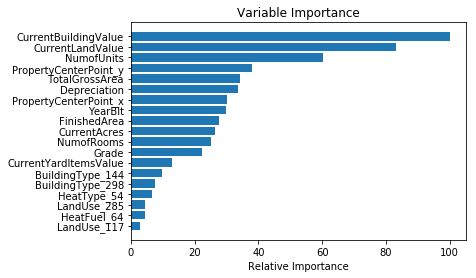

In [13]:
import matplotlib.pyplot as plt
feature_importance = reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### A simplified XGB model gives the best estimation result. This models takes features:'LandUse_117', 'HeatFuel_64','LandUse_285', 'HeatType_54', 'BuildingType_144', 'BuildingType_298','NumofUnits', 'CurrentYardItemsValue', 'NumofRooms', 'Grade', 'YearBlt','FinishedArea', 'Depreciation', 'PropertyCenterPoint_y','PropertyCenterPoint_x', 'CurrentAcres', 'TotalGrossArea','CurrentLandValue', 'CurrentBuildingValue'.  It has MSE: 9540009587.4448 and the Average Percentage of Abosulute Error: 20.48%.